## Observations and Insights 

In [ ]:
#References:
#https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/ 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_total = study_data['Mouse ID'].nunique()
mice_total

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = study_data[study_data.duplicated(keep=False)]
duplicated_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_data = study_data.loc[study_data['Mouse ID']=='g989']
duplicated_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_cleaned = study_data[~study_data.isin(duplicated_mice_data)].dropna(how='all')
mouse_metadata_clean = mouse_metadata.loc[mouse_metadata['Mouse ID']!= 'g989']
study_data_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21.0,16.0,0.0,45.000000,0.0
1,k403,Ramicane,Male,21.0,16.0,5.0,38.825898,0.0
2,k403,Ramicane,Male,21.0,16.0,10.0,35.014271,1.0
3,k403,Ramicane,Male,21.0,16.0,15.0,34.223992,1.0
4,k403,Ramicane,Male,21.0,16.0,20.0,32.997729,1.0
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9.0,30.0,25.0,63.145652,2.0
1889,z969,Naftisol,Male,9.0,30.0,30.0,65.841013,3.0
1890,z969,Naftisol,Male,9.0,30.0,35.0,69.176246,4.0
1891,z969,Naftisol,Male,9.0,30.0,40.0,70.314904,4.0


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_total_new = study_data_cleaned['Mouse ID'].nunique()
mice_total_new

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_grouped = study_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)']

drug_mean = drug_grouped.mean()
drug_median = drug_grouped.median()
drug_var = drug_grouped.var()
drug_std = drug_grouped.std()
drug_sem = drug_grouped.sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_summary = pd.DataFrame({
    'Mean':drug_mean,
    'Median': drug_median,
    'Variance': drug_var,
    'Standard Deviation': drug_std,
    'SEM': drug_sem
})
drug_summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

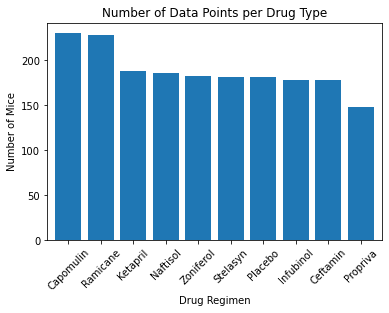

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#x_axis is treatment types
#y_axis is number of datapoints per treatment type
datapoints_per_drug = study_data_cleaned.groupby(['Drug Regimen'])['Mouse ID'].count().sort_values(ascending=False)

#mice_per_drug = study_data_cleaned.groupby(['Drug Regimen'])['Mouse ID'].nunique()
datapoints_per_drug.plot(kind='bar', width= 0.8, title='Number of Data Points per Drug Type', xlabel= 'Drug Regimen', ylabel= 'Number of Mice')
plt.xticks(rotation=45)
plt.show()

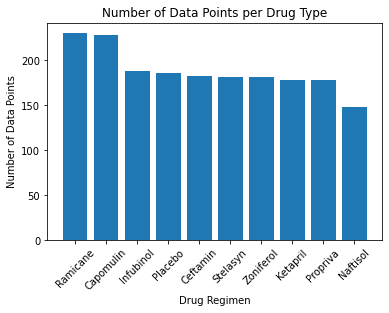

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_types = study_data_cleaned['Drug Regimen'].unique()
plt.bar(drug_types, datapoints_per_drug)
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points per Drug Type')
plt.show()

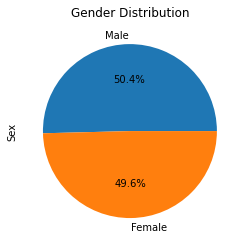

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution = mouse_metadata_clean['Sex'].value_counts()
#gender_distribution = study_data_cleaned['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title= 'Gender Distribution')
plt.show()

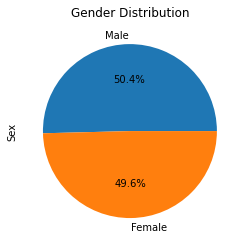

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_distribution, labels= gender_distribution.keys(), autopct='%1.1f%%')
plt.ylabel('Sex')
plt.title('Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

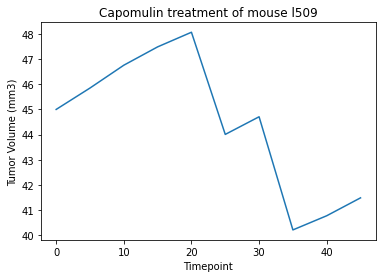

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_l509 = study_data_cleaned.loc[study_data_cleaned['Mouse ID']== 'l509']
mouse_l509.plot(kind='line', 
                x= 'Timepoint', 
                y= 'Tumor Volume (mm3)', 
                title='Capomulin treatment of mouse l509', 
                legend= False,
                xlabel='Timepoint', 
                ylabel='Tumor Volume (mm3)'
               )
plt.show()

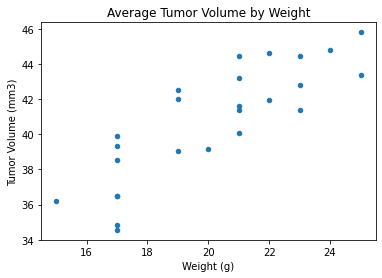

In [51]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = study_data_cleaned.loc[study_data_cleaned['Drug Regimen']=='Capomulin']
avg_tumor_by_mouse = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
mouse_weight = mouse_metadata_clean[['Mouse ID','Weight (g)']]

tumor_and_weight = pd.merge(mouse_weight, avg_tumor_by_mouse, how='right', on='Mouse ID')
tumor_and_weight.plot(kind='scatter', x= 'Weight (g)', y= 'Tumor Volume (mm3)', title= 'Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
